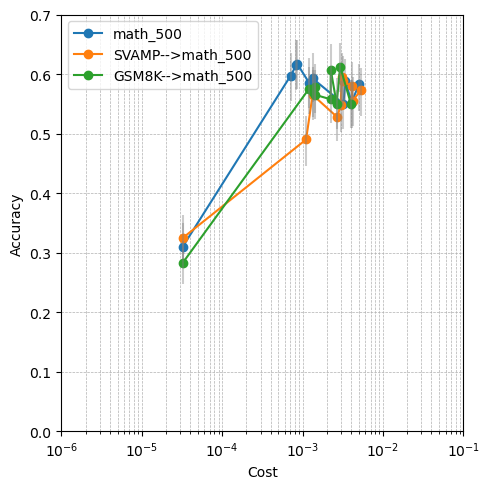

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
# import seaborn as sns
import numpy as np
import json
import itertools
import os

family='LLAMA'
trn_data = ['SVAMP', 'GSM8K']
test_data = 'math_500'

if family=='LLAMA':
            weak_llm = 'llama/llama_1b_32'
            strong_llm = 'llama/llama_405b_31'
            all_models = ['llama/llama_1b_32', 'llama/llama_3b_32', 
                          'llama/llama_70b_33', 'llama/llama_405b_31']
        
elif family=='QWEN':
    weak_llm = 'qwen/qwen_1b'
    strong_llm = 'qwen/qwen_72b'
    all_models = ['qwen/qwen_1b', 'qwen/qwen_32b', 'qwen/qwen_72b']
    

elif family=='GPT':
    weak_llm = 'openai_gpt/gpt35_turbo'
    strong_llm = 'openai_gpt/o3_mini'
    all_models = ['openai_gpt/gpt35_turbo', 'openai_gpt/gpt4o_mini',
                  'openai_gpt/o3_mini']
            
sample_budget = "5"

llm_list = fr'{"".join(all_models)}'.split("/")
model_string = "-".join(llm_list)

dict_list = []
labels = []

with open(f'logs/{test_data}/Ours/{family}/boot/{model_string}_budget_{sample_budget}.json',
              'r') as fp:
    c3po = json.load(fp)
    dict_list.append(c3po)
    labels.append(test_data)

for trn_data_ in trn_data:
    with open(f'logs/{trn_data_}_{test_data}/Ours_shift/{family}/boot/{model_string}_budget_{sample_budget}.json',
              'r') as fp:
        c3po = json.load(fp)
        dict_list.append(c3po)
        trn_test = trn_data_ + '-->' + test_data
        labels.append(trn_test)

plt.figure(figsize=(5, 5))

# Plot each dictionary
for i, data in enumerate(dict_list):
    x = list(data.keys())
    x = [float(xx) for xx in x]
    y = [v[0] for v in data.values()]
    lower = [v[1] for v in data.values()]
    upper = [v[2] for v in data.values()]
    
    # Sort for plotting
    x, y, lower, upper = zip(*sorted(zip(x, y, lower, upper)))
    
    # Plot mean line
    plt.plot(x, y, marker='o', label=labels[i])
    
    # Plot confidence interval as vertical lines
    for xi, lo, hi in zip(x, lower, upper):
        plt.vlines(xi, lo, hi, color='gray', alpha=0.4)

# Optional: log scale
plt.xscale('log')

# Add legend
plt.legend()
plt.xlim(1e-6, 1e-1)
plt.ylim(0.0, 0.7)
# Titles and formatting
# plt.title("Multiple Runs with Confidence Intervals")
plt.xlabel("Cost")
plt.ylabel("Accuracy")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.savefig(test_data + '_' + family + '_distribution_shift_c3po.pdf', format='pdf')

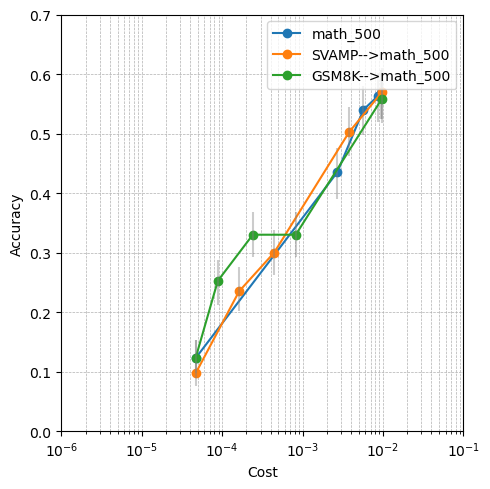

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
# import seaborn as sns
import numpy as np
import json
import itertools
import os

family='LLAMA'
trn_data = ['SVAMP', 'GSM8K']
test_data = 'math_500'

if family=='LLAMA':
            weak_llm = 'llama/llama_1b_32'
            strong_llm = 'llama/llama_405b_31'
            all_models = ['llama/llama_1b_32', 'llama/llama_3b_32', 
                          'llama/llama_70b_33', 'llama/llama_405b_31']
        
elif family=='QWEN':
    weak_llm = 'qwen/qwen_1b'
    strong_llm = 'qwen/qwen_72b'
    all_models = ['qwen/qwen_1b', 'qwen/qwen_32b', 'qwen/qwen_72b']
    

elif family=='GPT':
    weak_llm = 'openai_gpt/gpt35_turbo'
    strong_llm = 'openai_gpt/o3_mini'
    all_models = ['openai_gpt/gpt35_turbo', 'openai_gpt/gpt4o_mini',
                  'openai_gpt/o3_mini']
            
sample_budget = "5"

llm_list = fr'{"".join(all_models)}'.split("/")
model_string = "-".join(llm_list)

dict_list = []
labels = []

with open(f'logs/{test_data}/FrugalGPT/{family}/boot/{model_string}_budget_{sample_budget}.json',
              'r') as fp:
    c3po = json.load(fp)
    dict_list.append(c3po)
    labels.append(test_data)

for trn_data_ in trn_data:
    with open(f'logs/{trn_data_}_{test_data}/FrugalGPT_shift/{family}/boot/{model_string}_budget_{sample_budget}.json',
              'r') as fp:
        c3po = json.load(fp)
        dict_list.append(c3po)
        trn_test = trn_data_ + '-->' + test_data
        labels.append(trn_test)

plt.figure(figsize=(5, 5))

# Plot each dictionary
for i, data in enumerate(dict_list):
    x = list(data.keys())
    x = [float(xx) for xx in x]
    y = [v[0] for v in data.values()]
    lower = [v[1] for v in data.values()]
    upper = [v[2] for v in data.values()]
    
    # Sort for plotting
    x, y, lower, upper = zip(*sorted(zip(x, y, lower, upper)))
    
    # Plot mean line
    plt.plot(x, y, marker='o', label=labels[i])
    
    # Plot confidence interval as vertical lines
    for xi, lo, hi in zip(x, lower, upper):
        plt.vlines(xi, lo, hi, color='gray', alpha=0.4)

# Optional: log scale
plt.xscale('log')

# Add legend
plt.legend()
plt.xlim(1e-6, 1e-1)
plt.ylim(0.0, 0.7)
# Titles and formatting
# plt.title("Multiple Runs with Confidence Intervals")
plt.xlabel("Cost")
plt.ylabel("Accuracy")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.savefig(test_data + '_' + family + '_distribution_shift_frugal.pdf', format='pdf')

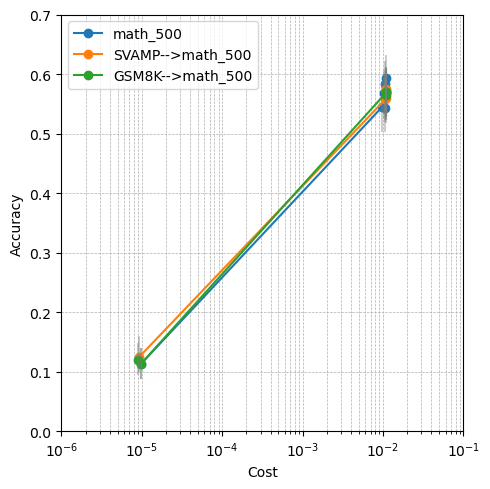

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
# import seaborn as sns
import numpy as np
import json
import itertools
import os

family='LLAMA'
trn_data = ['SVAMP', 'GSM8K']
test_data = 'math_500'

if family=='LLAMA':
            weak_llm = 'llama/llama_1b_32'
            strong_llm = 'llama/llama_405b_31'
            all_models = ['llama/llama_1b_32', 'llama/llama_3b_32', 
                          'llama/llama_70b_33', 'llama/llama_405b_31']
        
elif family=='QWEN':
    weak_llm = 'qwen/qwen_1b'
    strong_llm = 'qwen/qwen_72b'
    all_models = ['qwen/qwen_1b', 'qwen/qwen_32b', 'qwen/qwen_72b']
    

elif family=='GPT':
    weak_llm = 'openai_gpt/gpt35_turbo'
    strong_llm = 'openai_gpt/o3_mini'
    all_models = ['openai_gpt/gpt35_turbo', 'openai_gpt/gpt4o_mini',
                  'openai_gpt/o3_mini']
            
sample_budget = "5"

llm_list = fr'{"".join(all_models)}'.split("/")
model_string = "-".join(llm_list)

dict_list = []
labels = []

with open(f'logs/{test_data}/TREACLE/{family}/boot/{model_string}_budget_{sample_budget}.json',
              'r') as fp:
    c3po = json.load(fp)
    dict_list.append(c3po)
    labels.append(test_data)

for trn_data_ in trn_data:
    with open(f'logs/{trn_data_}_{test_data}/TREACLE_shift/{family}/boot/{model_string}_budget_{sample_budget}.json',
              'r') as fp:
        c3po = json.load(fp)
        dict_list.append(c3po)
        trn_test = trn_data_ + '-->' + test_data
        labels.append(trn_test)

plt.figure(figsize=(5, 5))

# Plot each dictionary
for i, data in enumerate(dict_list):
    x = list(data.keys())
    x = [float(xx) for xx in x]
    y = [v[0] for v in data.values()]
    lower = [v[1] for v in data.values()]
    upper = [v[2] for v in data.values()]
    
    # Sort for plotting
    x, y, lower, upper = zip(*sorted(zip(x, y, lower, upper)))
    
    # Plot mean line
    plt.plot(x, y, marker='o', label=labels[i])
    
    # Plot confidence interval as vertical lines
    for xi, lo, hi in zip(x, lower, upper):
        plt.vlines(xi, lo, hi, color='gray', alpha=0.4)

# Optional: log scale
plt.xscale('log')

# Add legend
plt.legend()
plt.xlim(1e-6, 1e-1)
plt.ylim(0.0, 0.7)
# Titles and formatting
# plt.title("Multiple Runs with Confidence Intervals")
plt.xlabel("Cost")
plt.ylabel("Accuracy")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.savefig(test_data + '_' + family + '_distribution_shift_treacle.pdf', format='pdf')

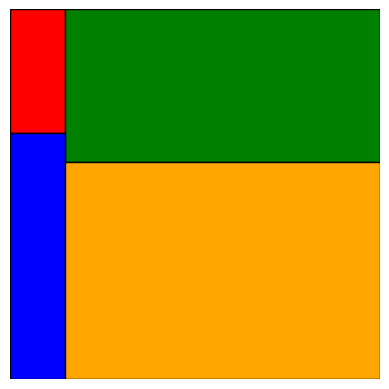

In [85]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_2x2_area_fit(areas, colors=None):
    assert len(areas) == 4, "Exactly 4 area values are required."
    assert abs(sum(areas) - 1.0) < 1e-6, "Areas must sum to 1."

    if colors is None:
        colors = ['red', 'green', 'blue', 'orange']

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Split square into two vertical halves
    left_area = areas[0] + areas[2]
    right_area = areas[1] + areas[3]

    # Widths of left and right sections
    left_width = left_area
    right_width = 1 - left_width

    # Heights of rectangles in left column
    height0 = areas[0] / left_width
    height2 = areas[2] / left_width

    # Heights of rectangles in right column
    height1 = areas[1] / right_width
    height3 = areas[3] / right_width

    # Draw rectangles
    rects = [
        (0, 1 - height0, left_width, height0),               # Top-left
        (left_width, 1 - height1, right_width, height1),     # Top-right
        (0, 0, left_width, height2),                         # Bottom-left
        (left_width, 0, right_width, height3)                # Bottom-right
    ]

    for i in range(4):
        x, y, w, h = rects[i]
        rect = patches.Rectangle((x, y), w, h, facecolor=colors[i], edgecolor='black')
        ax.add_patch(rect)

    plt.axis('off')
    plt.show()

# Example usage
areas = [0.05, 0.35, 0.1, 0.5]  # Must sum to 1
draw_2x2_area_fit(areas)


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import itertools
import os

dataset = 'math_500'
family = 'QWEN'  #'LLAMA'# 'GPT' #'LLAMA'
if family=='LLAMA':
    weak_llm = 'llama/llama_1b_32'
    strong_llm = 'llama/llama_405b_31'
    all_models = ['llama/llama_1b_32', 'llama/llama_3b_32', 
                  'llama/llama_70b_33', 'llama/llama_405b_31']

elif family=='QWEN':
    weak_llm = 'qwen/qwen_1b'
    strong_llm = 'qwen/qwen_72b'
    all_models = ['qwen/qwen_1b', 'qwen/qwen_32b', 'qwen/qwen_72b']

elif family=='GPT':
    weak_llm = 'openai_gpt/gpt35_turbo'
    strong_llm = 'openai_gpt/o3_mini'
    all_models = ['openai_gpt/gpt35_turbo', 'openai_gpt/gpt4o_mini',
                  'openai_gpt/o3_mini']
    
sample_budget = "5"

#########################################################################

llm_list = fr'{"".join(all_models)}'.split("/")
model_string = "-".join(llm_list)

#########################################################################
with open(f'logs/{dataset}/Ours_exit/{family}/boot/{model_string}_budget_{sample_budget}.json',
          'r') as fp:
    c3po = json.load(fp)

c3po = sorted(c3po.items(), key=lambda item: item[0], reverse=True)[0]

exits_ = np.array(c3po[1][-1])
# print(len(exits_))
#########################################################################
import json
levels = []
with open('data/Math_500/dataset.jsonl', 'r') as f:
    for line in f:
        data_ = json.loads(line)
        levels.append(data_['level'])

levels = np.array(levels[100:])

level_total = []

for ll in np.unique(levels):
    level_total.append(np.sum(levels==ll))


for ll in np.unique(levels):
    for ee in np.unique(exits_):
        exit_p = 100 * len(np.where((levels==ll) & (exits_==ee))[0])/ len(np.where(levels==ll)[0])
        print('Level ' + str(ll) + ', exit ' + str(ee) + 
              ', percentage ' + str(np.round(exit_p, 1)))


Level 1, exit 0, percentage 53.1
Level 1, exit 1, percentage 46.9
Level 1, exit 2, percentage 0.0
Level 2, exit 0, percentage 33.8
Level 2, exit 1, percentage 47.7
Level 2, exit 2, percentage 18.5
Level 3, exit 0, percentage 25.6
Level 3, exit 1, percentage 57.0
Level 3, exit 2, percentage 17.4
Level 4, exit 0, percentage 17.9
Level 4, exit 1, percentage 48.1
Level 4, exit 2, percentage 34.0
Level 5, exit 0, percentage 4.5
Level 5, exit 1, percentage 43.2
Level 5, exit 2, percentage 52.3


C3POcost: [0.0, 0.0012, 0.0013, 0.0014, 0.0014, 0.0022, 0.0022, 0.0027, 0.0029, 0.004]acc.:[0.282, 0.575, 0.57, 0.578, 0.565, 0.558, 0.608, 0.55, 0.612, 0.55]
FrugalGPTcost: [0.0, 0.0001, 0.0002, 0.0008, 0.0096]acc.:[0.122, 0.252, 0.33, 0.33, 0.558]
TREACLEcost: [0.0, 0.0, 0.0107, 0.0108, 0.0108, 0.0108]acc.:[0.12, 0.112, 0.568, 0.565, 0.57, 0.57]


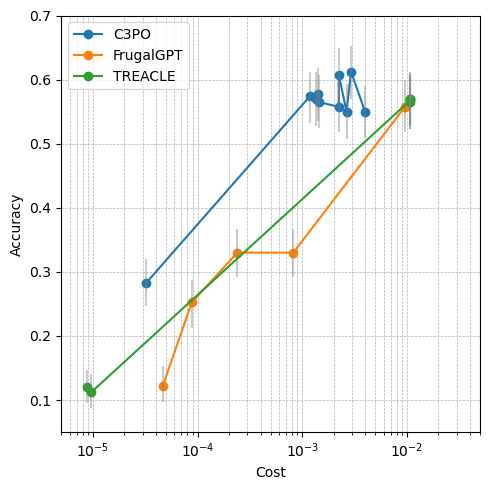

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
# import seaborn as sns
import numpy as np
import json
import itertools
import os

family='LLAMA'
trn_data = 'GSM8K' #'SVAMP'
test_data = 'math_500'

if family=='LLAMA':
            weak_llm = 'llama/llama_1b_32'
            strong_llm = 'llama/llama_405b_31'
            all_models = ['llama/llama_1b_32', 'llama/llama_3b_32', 
                          'llama/llama_70b_33', 'llama/llama_405b_31']
        
elif family=='QWEN':
    weak_llm = 'qwen/qwen_1b'
    strong_llm = 'qwen/qwen_72b'
    all_models = ['qwen/qwen_1b', 'qwen/qwen_32b', 'qwen/qwen_72b']
    

elif family=='GPT':
    weak_llm = 'openai_gpt/gpt35_turbo'
    strong_llm = 'openai_gpt/o3_mini'
    all_models = ['openai_gpt/gpt35_turbo', 'openai_gpt/gpt4o_mini',
                  'openai_gpt/o3_mini']
            
sample_budget = "5"

llm_list = fr'{"".join(all_models)}'.split("/")
model_string = "-".join(llm_list)

dict_list = []
labels = []

with open(f'logs/{trn_data_}_{test_data}/Ours_shift/{family}/boot/{model_string}_budget_{sample_budget}.json',
          'r') as fp:
    c3po = json.load(fp)
    dict_list.append(c3po)
    labels.append('C3PO')

with open(f'logs/{trn_data_}_{test_data}/FrugalGPT_shift/{family}/boot/{model_string}_budget_{sample_budget}.json',
          'r') as fp:
    frugal = json.load(fp)
    dict_list.append(frugal)
    labels.append('FrugalGPT')

with open(f'logs/{trn_data_}_{test_data}/TREACLE_shift/{family}/boot/{model_string}_budget_{sample_budget}.json',
          'r') as fp:
    treacle = json.load(fp)
    dict_list.append(treacle)
    labels.append('TREACLE')

plt.figure(figsize=(5, 5))

# Plot each dictionary
for i, data in enumerate(dict_list):
    x = list(data.keys())
    x = [float(xx) for xx in x]
    y = [v[0] for v in data.values()]
    lower = [v[1] for v in data.values()]
    upper = [v[2] for v in data.values()]
    
    # Sort for plotting
    x, y, lower, upper = zip(*sorted(zip(x, y, lower, upper)))
    
    # Plot mean line
    plt.plot(x, y, marker='o', label=labels[i])

    print(labels[i] + 'cost: ' + str([np.round(xx, 4) for xx in x]) + 'acc.:' + str([np.round(xx, 3) for xx in y]))
    
    # Plot confidence interval as vertical lines
    for xi, lo, hi in zip(x, lower, upper):
        plt.vlines(xi, lo, hi, color='gray', alpha=0.4)

# Optional: log scale
plt.xscale('log')

# Add legend
plt.legend()
plt.xlim(5e-6, 5e-2)
plt.ylim(0.05, 0.7)
# Titles and formatting
# plt.title("Multiple Runs with Confidence Intervals")
plt.xlabel("Cost")
plt.ylabel("Accuracy")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
# plt.show()
plt.savefig(trn_data + '_' + test_data + '_' + family + '_distribution_shift.pdf', format='pdf')